In [112]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [113]:
df = pd.read_csv('combined_metrics.csv')
df


,Target,Sorting_Var,Method,Testing Batch,RMSE,R2,evalt
0,target_CHEMBL240,logp,RF,1,0.539731,0.336317,sorted_fcv
1,target_CHEMBL240,logp,RF,2,0.567511,0.014182,sorted_fcv
2,target_CHEMBL240,logp,RF,3,1.089359,-0.077649,sorted_fcv
3,target_CHEMBL240,logp,RF,4,0.707705,0.518710,sorted_fcv
4,target_CHEMBL240,logp,RF,5,0.758903,0.613842,sorted_fcv
...,...,...,...,...,...,...,...
418,target_CHEMBL279,None,MLP,6,0.909121,0.461547,cv_scaffold
419,target_CHEMBL279,None,MLP,7,0.890862,0.354422,cv_scaffold
420,target_CHEMBL279,None,MLP,8,0.879394,0.318483,cv_scaffold
421,target_CHEMBL279,None,MLP,9,0.818693,0.550499,cv_scaffold


In [114]:
df.Sorting_Var.unique()

array(['logp', 'pchembl', 'None'], dtype=object)

target_CHEMBL240
sorted_fcv


<Figure size 1600x800 with 0 Axes>

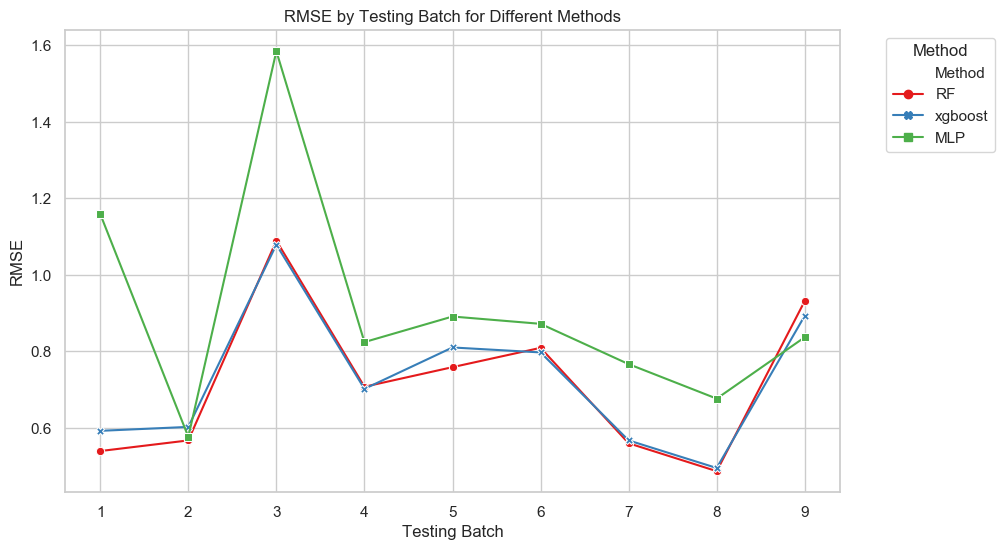

target_CHEMBL240
unsorted_fcv


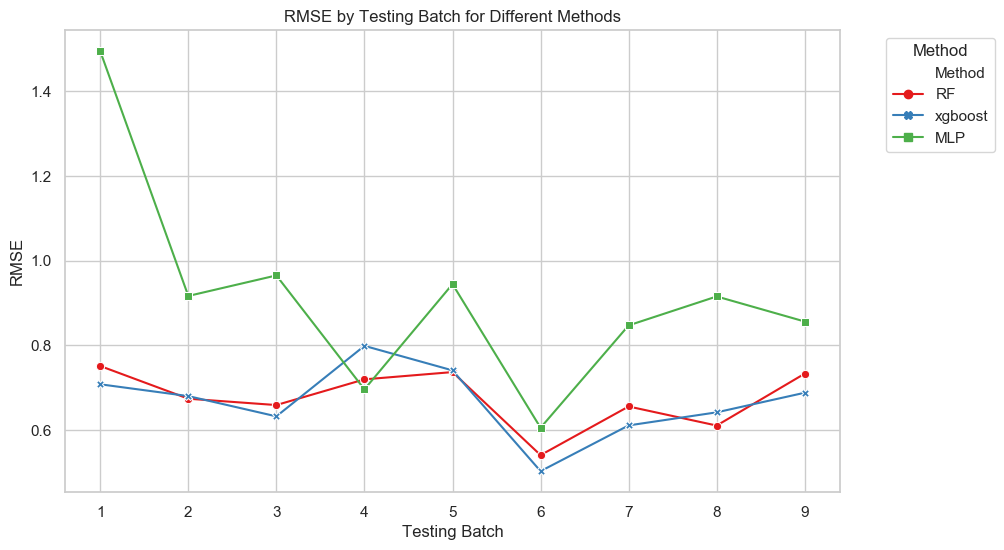

target_CHEMBL240
cv


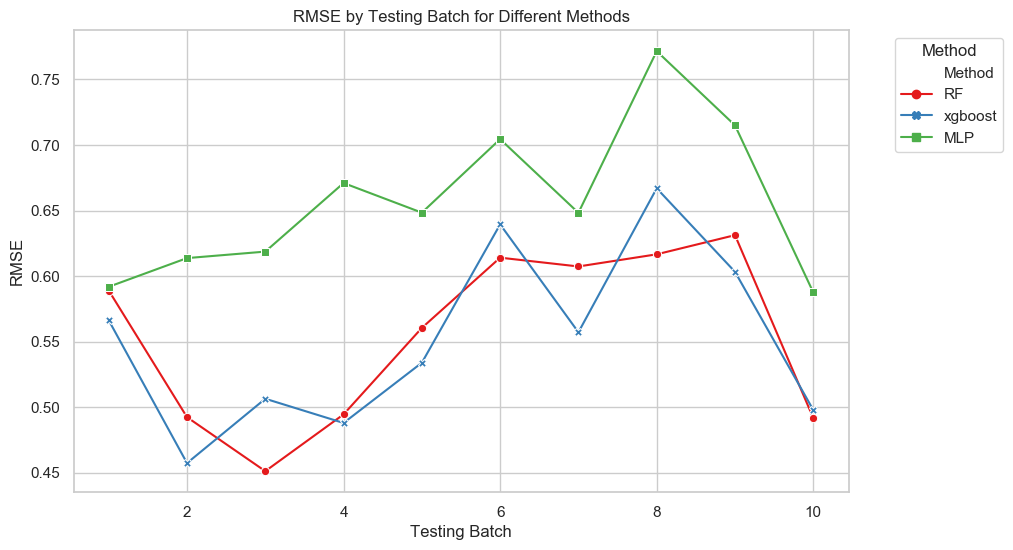

target_CHEMBL240
cv_scaffold


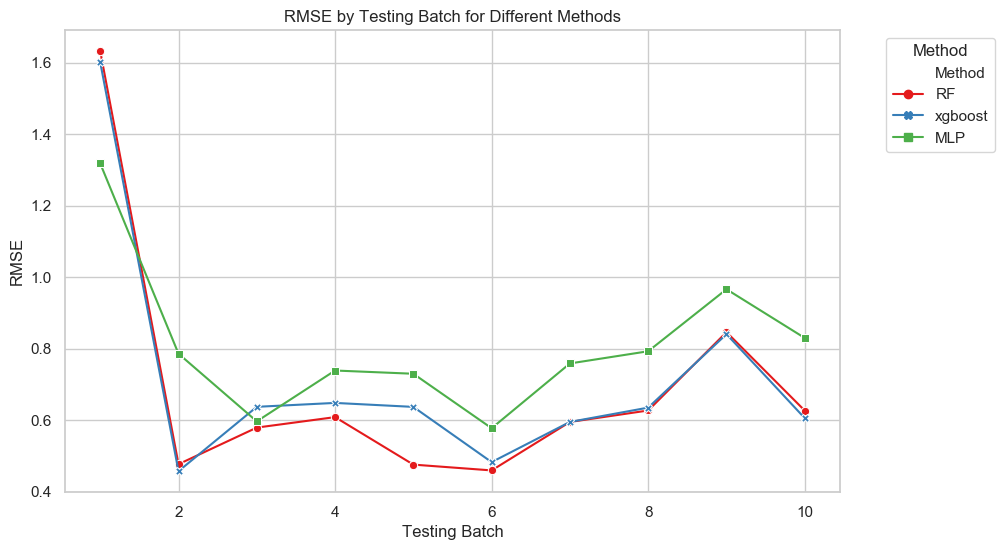

target_CHEMBL260
sorted_fcv


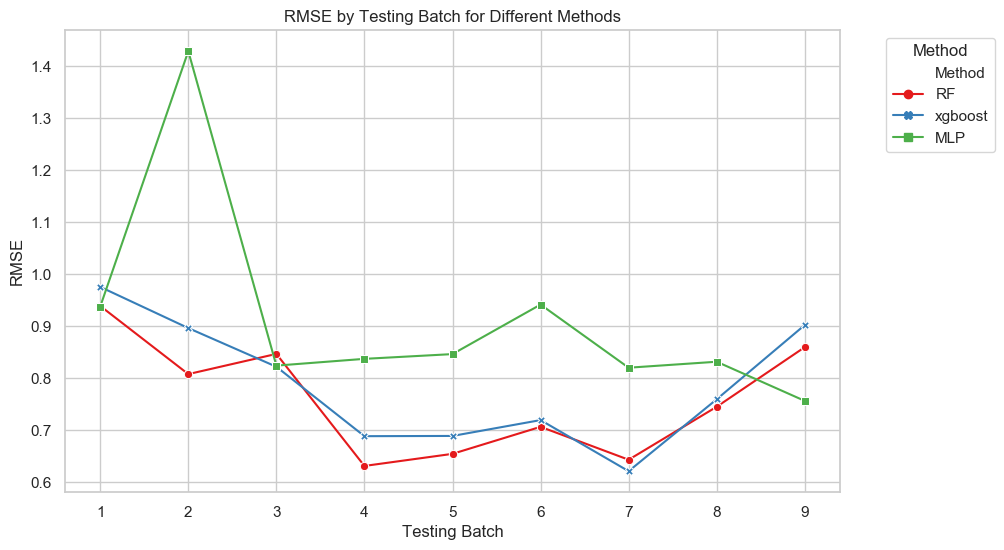

target_CHEMBL260
unsorted_fcv


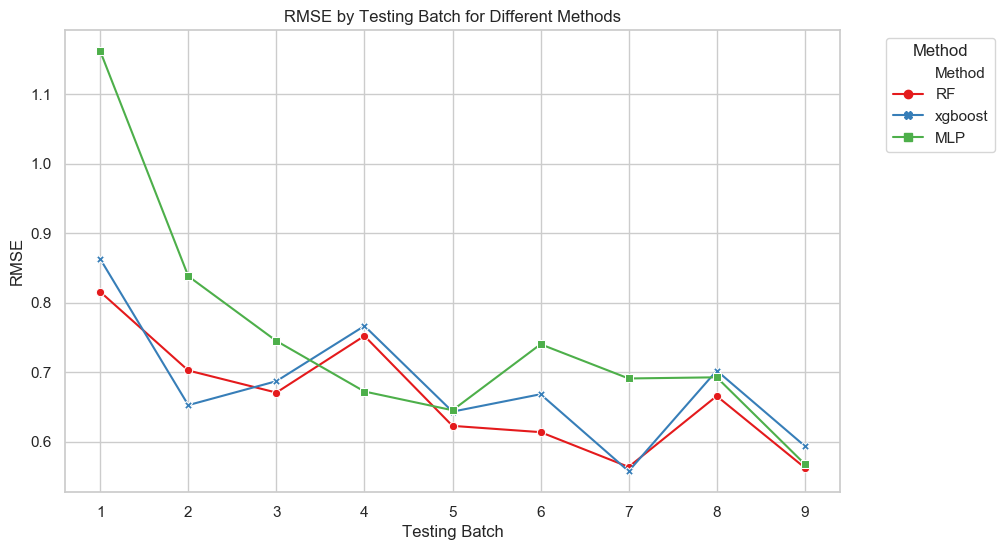

target_CHEMBL260
cv


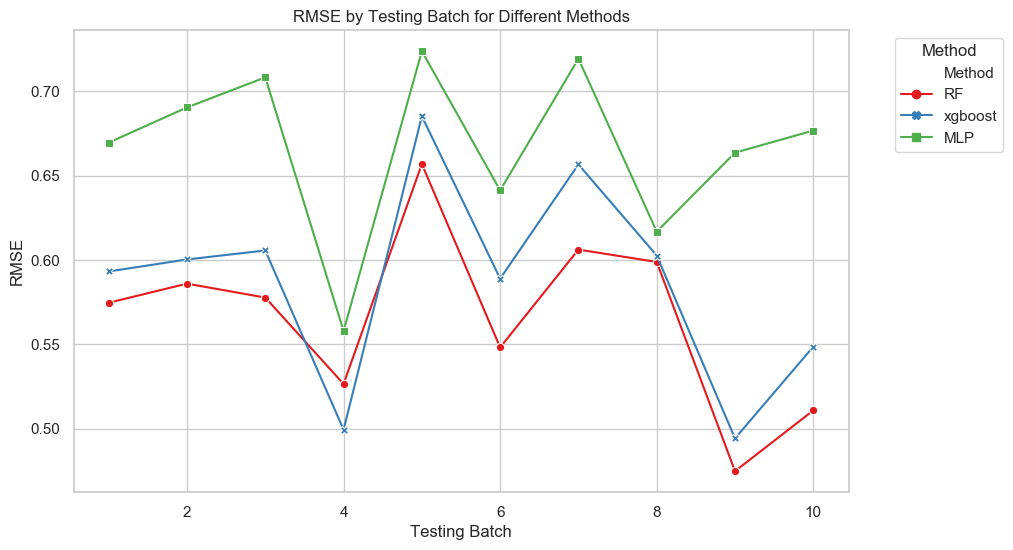

target_CHEMBL260
cv_scaffold


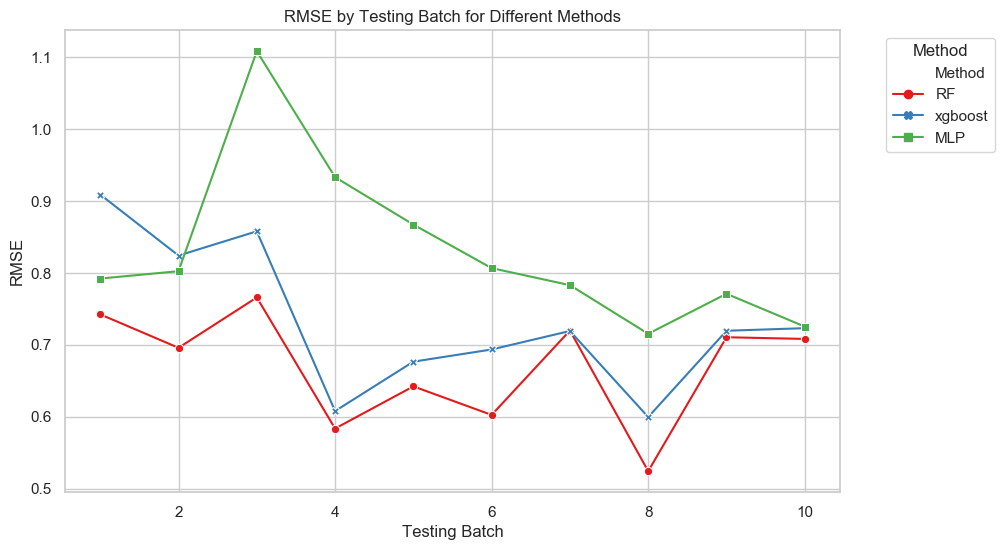

target_CHEMBL279
sorted_fcv


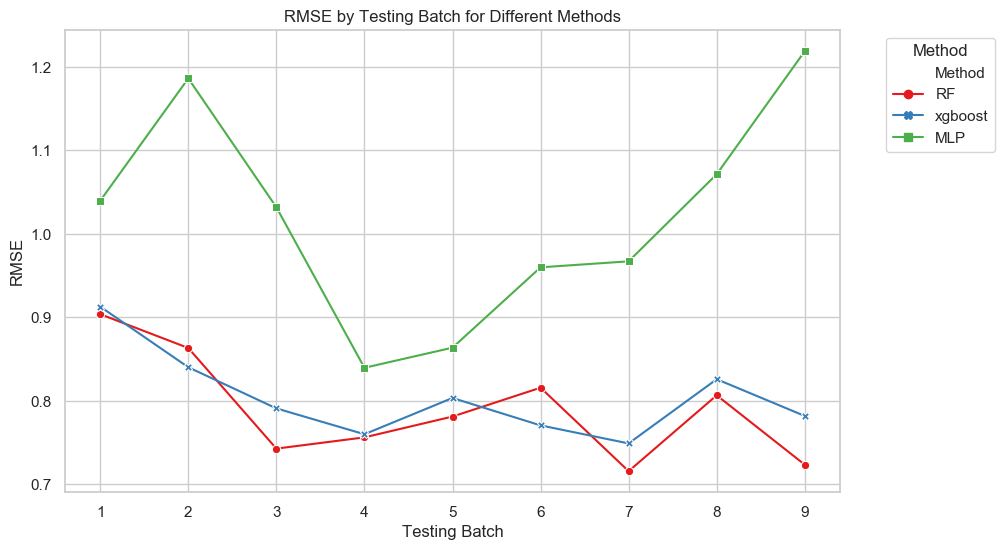

target_CHEMBL279
unsorted_fcv


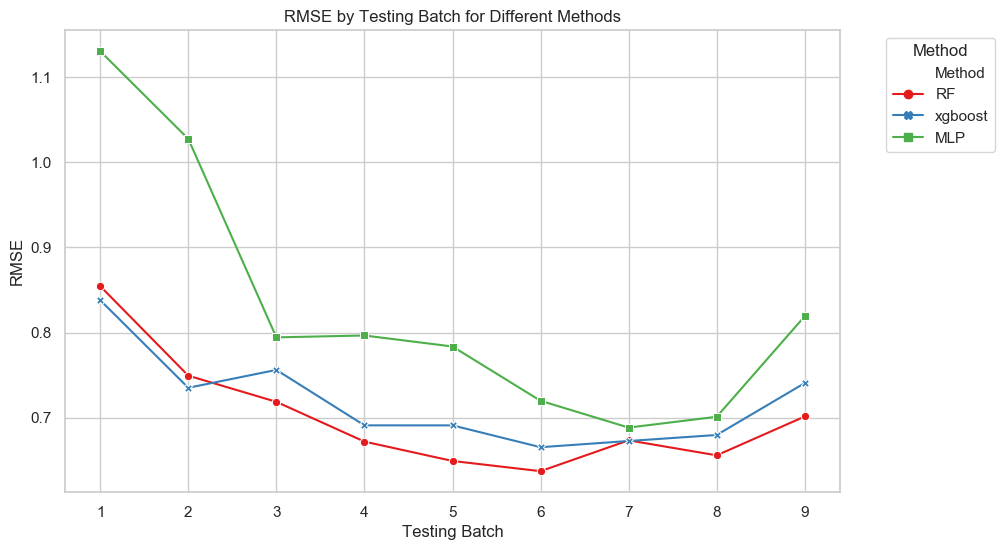

target_CHEMBL279
cv


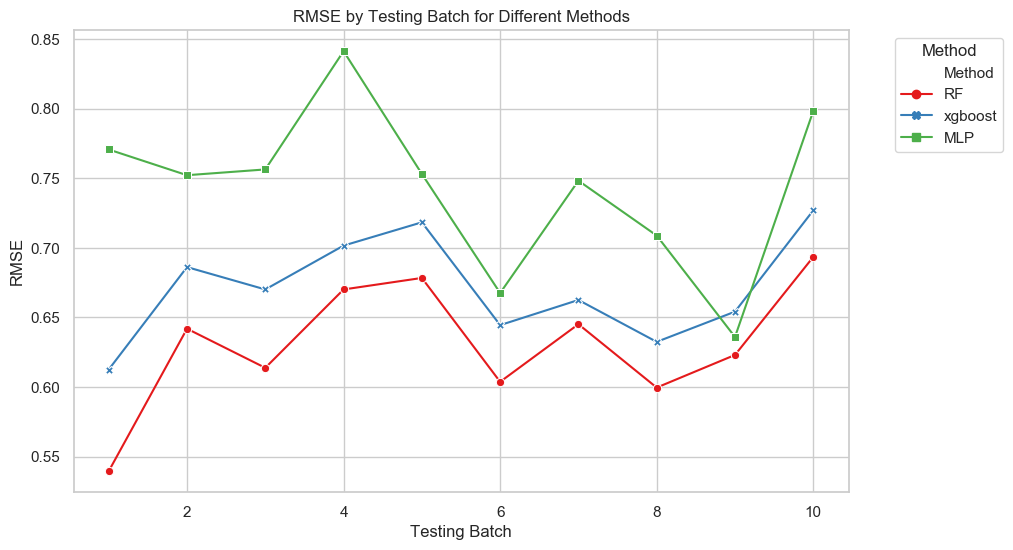

target_CHEMBL279
cv_scaffold


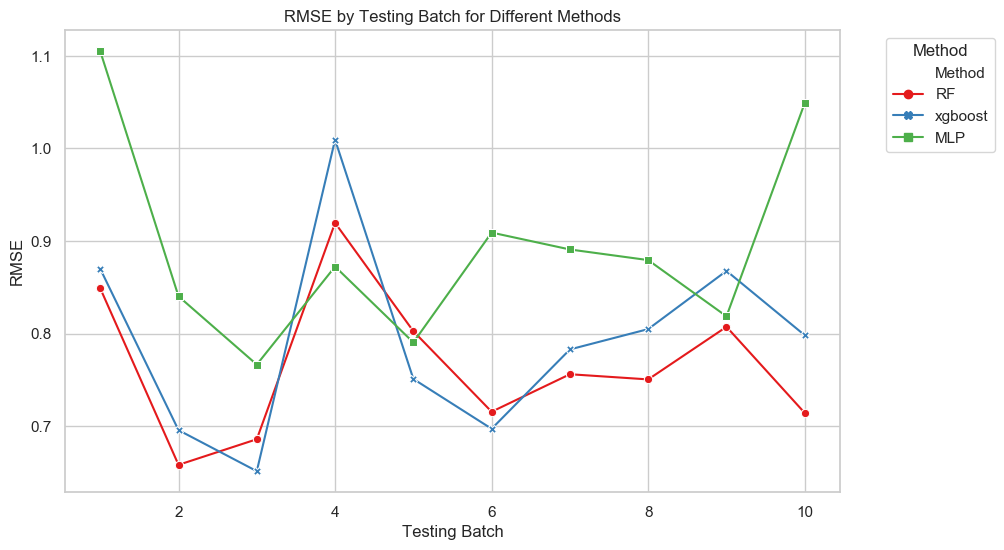

In [115]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4), dpi=200) 

for target in df.Target.unique():
    for evalt in df.evalt.unique():    
        print(target)
        print(evalt)

        test = df[df["Target"]==target]
        test = test[test["evalt"]==evalt]
        test = test[test["Sorting_Var"]!="pchembl"]
        # Set up the visualization


        plt.figure(figsize=(10, 6))

        # Create a line plot with scatter points
        sns.lineplot(data=test, x='Testing Batch', y='RMSE', hue='Method', marker='o', palette='Set1', markers=True, style='Method', dashes=False)

        # Customize the plot
        plt.title('RMSE by Testing Batch for Different Methods')
        plt.xlabel('Testing Batch')
        plt.ylabel('RMSE')
        plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Show the plot
        plt.show()

target_CHEMBL240
sorted_fcv


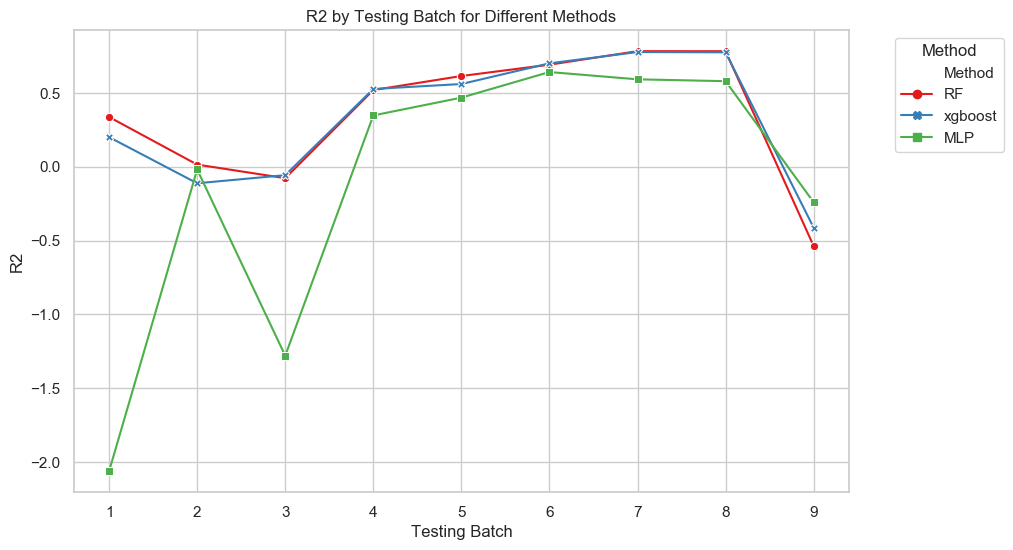

target_CHEMBL240
unsorted_fcv


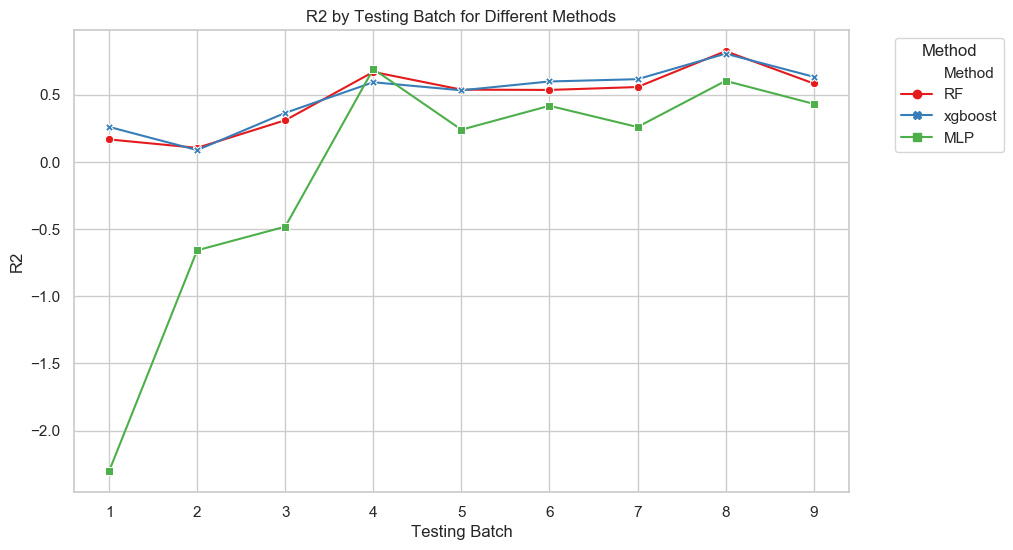

target_CHEMBL240
cv


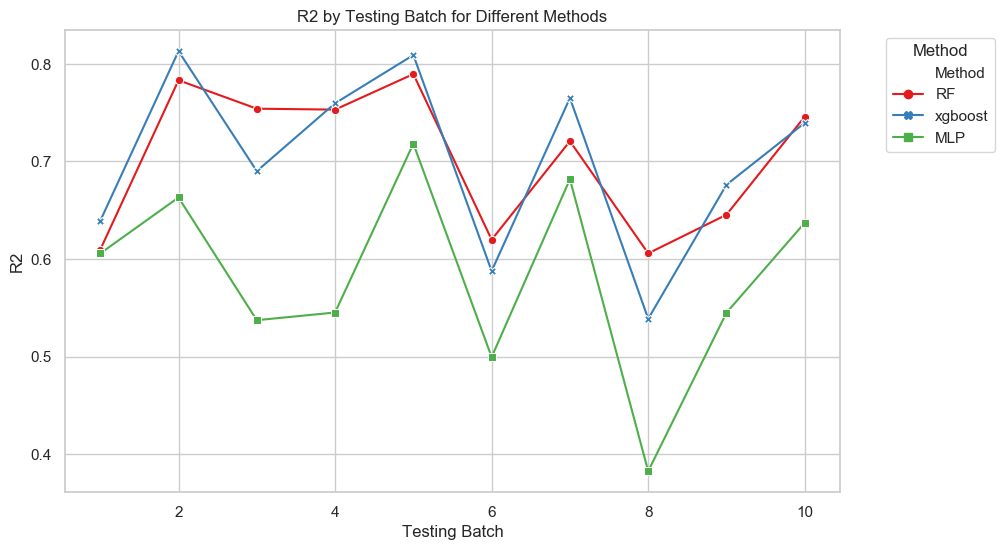

target_CHEMBL240
cv_scaffold


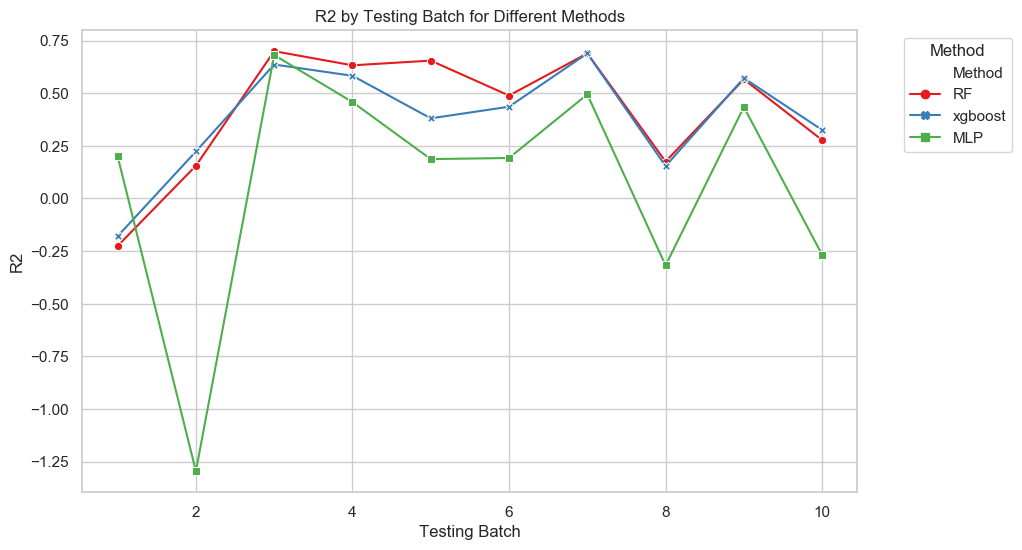

target_CHEMBL260
sorted_fcv


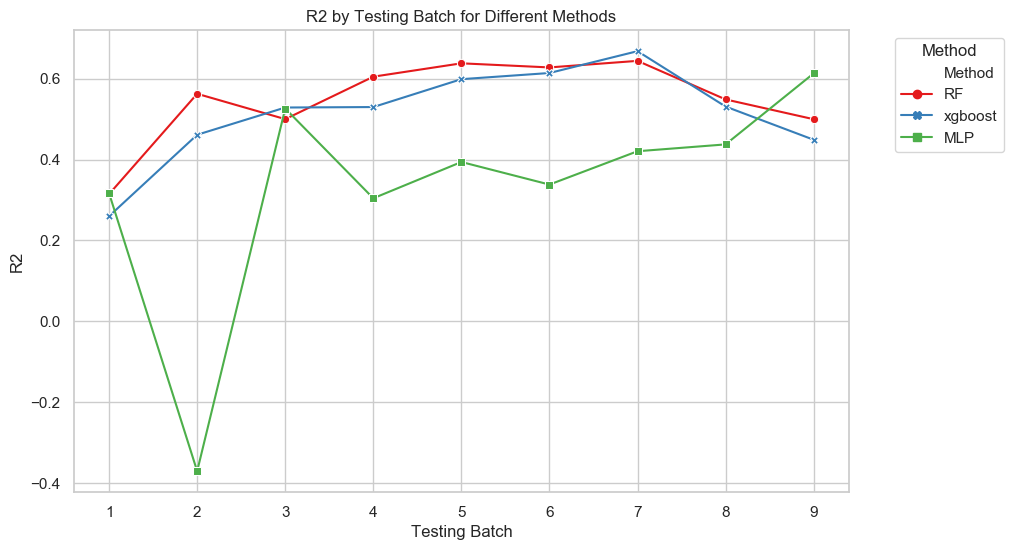

target_CHEMBL260
unsorted_fcv


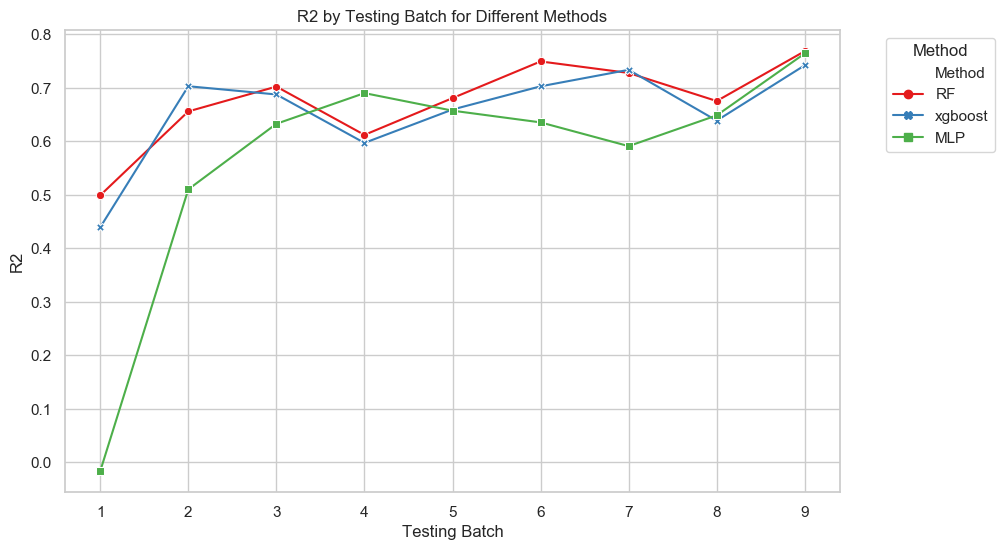

target_CHEMBL260
cv


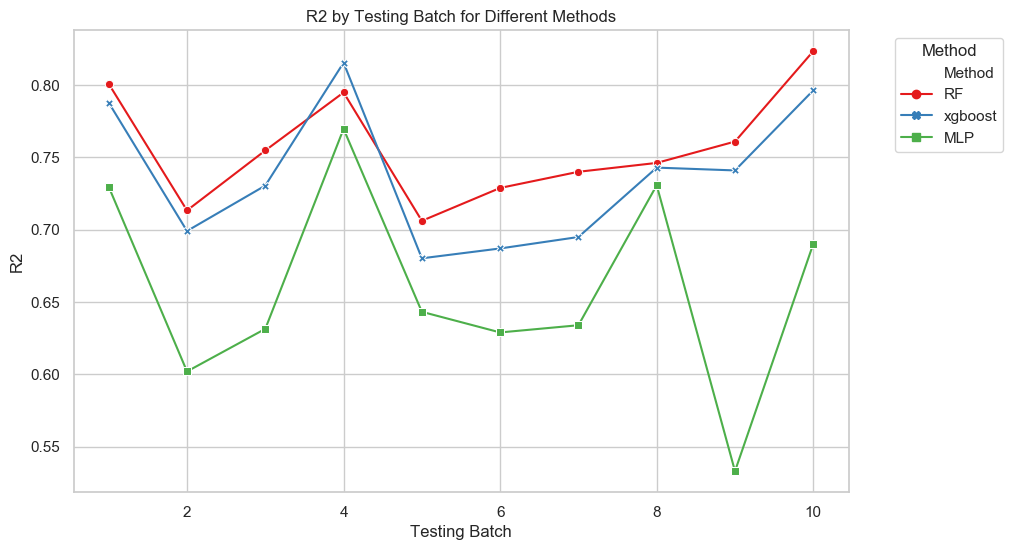

target_CHEMBL260
cv_scaffold


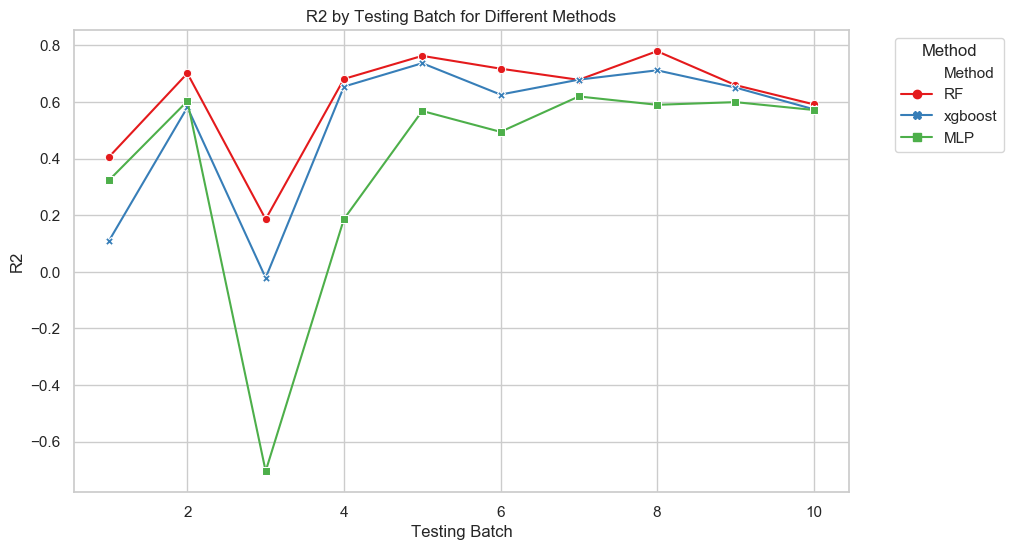

target_CHEMBL279
sorted_fcv


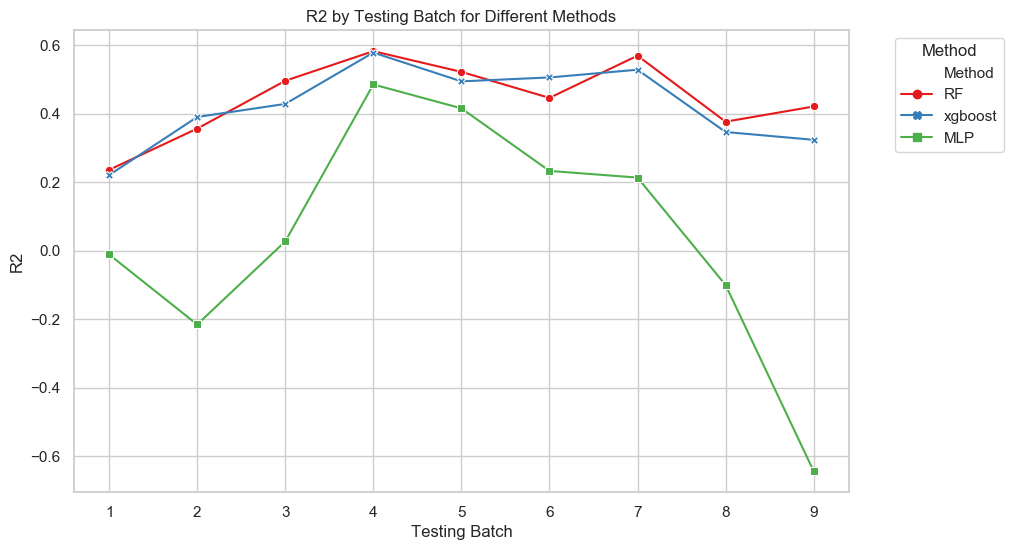

target_CHEMBL279
unsorted_fcv


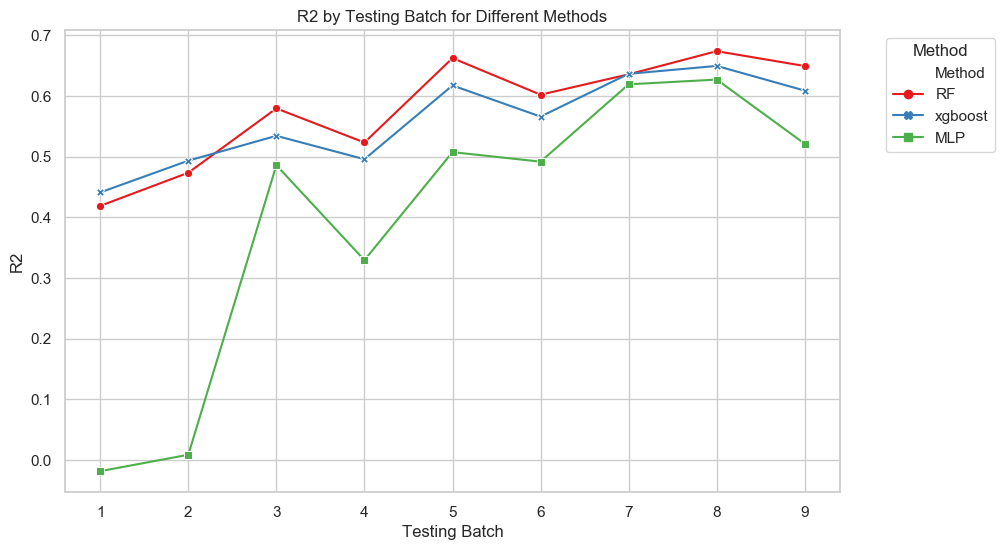

target_CHEMBL279
cv


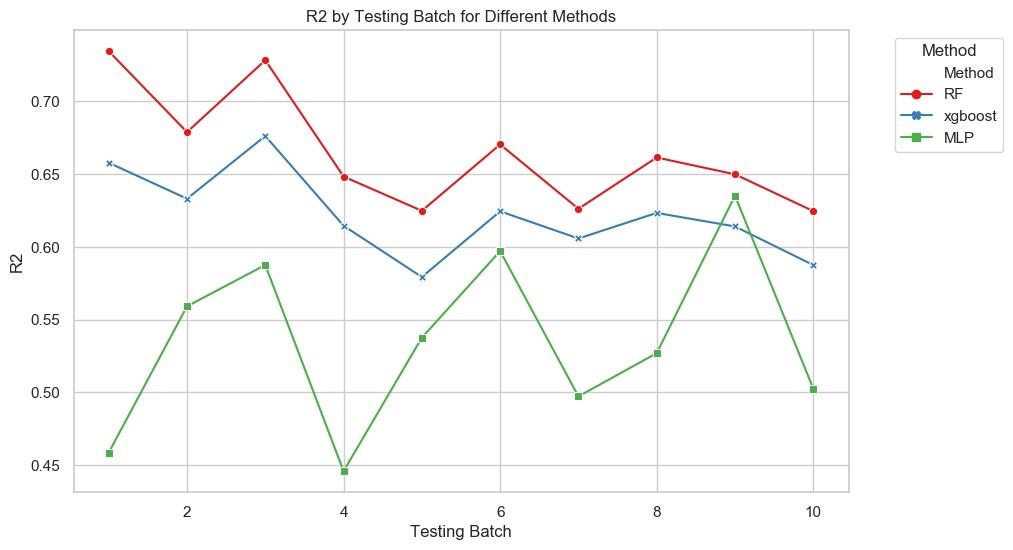

target_CHEMBL279
cv_scaffold


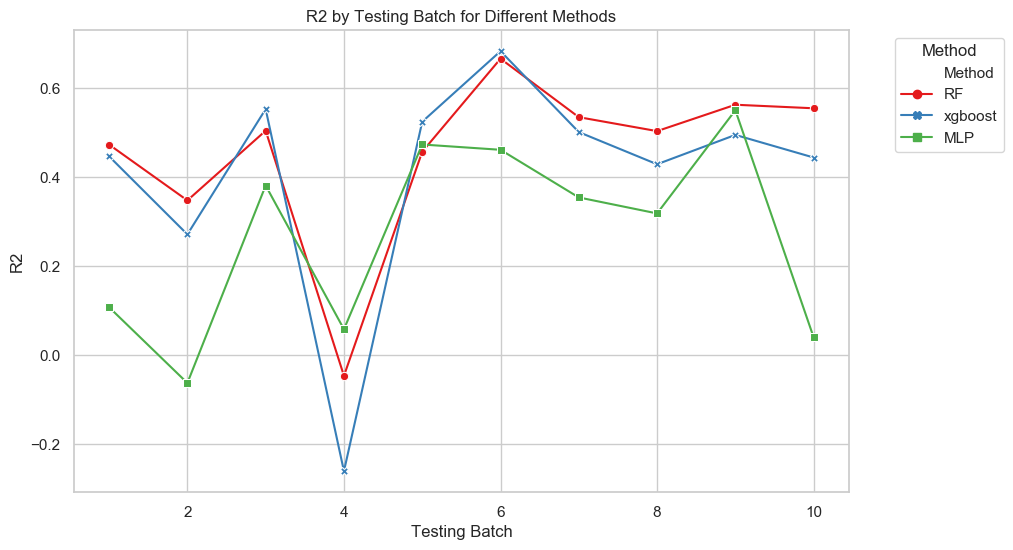

In [116]:
sns.set(style="whitegrid")
    
for target in df.Target.unique():
    for evalt in df.evalt.unique():    
        print(target)
        print(evalt)

        test = df[df["Target"]==target]
        test = test[test["evalt"]==evalt]
        test = test[test["Sorting_Var"]!="pchembl"]
        # Set up the visualization


        plt.figure(figsize=(10, 6))

        # Create a line plot with scatter points
        sns.lineplot(data=test, x='Testing Batch', y='R2', hue='Method', marker='o', palette='Set1', markers=True, style='Method', dashes=False)

        # Customize the plot
        plt.title('R2 by Testing Batch for Different Methods')
        plt.xlabel('Testing Batch')
        plt.ylabel('R2')
        plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Show the plot
        plt.show()

target_CHEMBL240


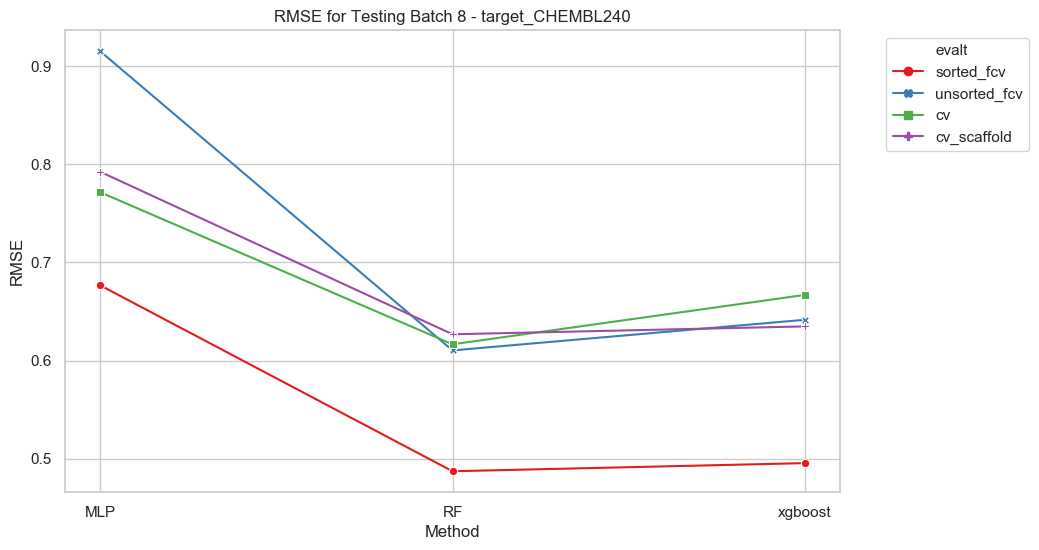

target_CHEMBL260


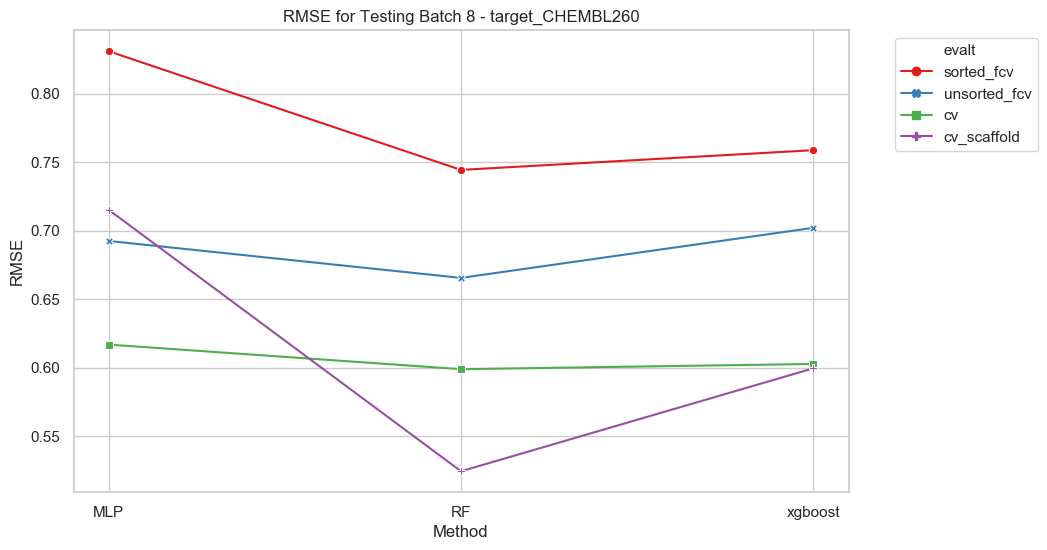

target_CHEMBL279


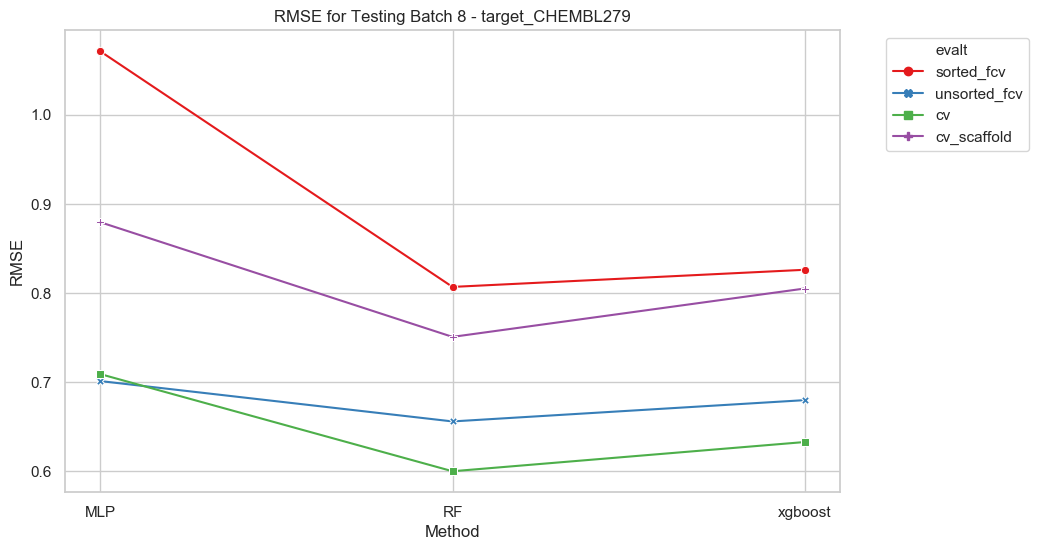

In [117]:
sns.set(style="whitegrid")
    
for target in df.Target.unique():
    print(target)
    test = df[df["Target"]==target]
    test = test[test["Sorting_Var"]!="pchembl"]
    test = test[test["Testing Batch"] == 8]
    
    plt.figure(figsize=(10, 6))
    # Create a line plot with scatter points for each target
    sns.lineplot(data=test, x='Method', y='RMSE', hue='evalt', marker='o', 
                 palette='Set1', markers=True, style='evalt', dashes=False)

    # Customize the plot
    plt.title(f'RMSE for Testing Batch 8 - {target}')
    plt.ylabel('RMSE')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


    # Show the plot
    plt.show()
    

target_CHEMBL240


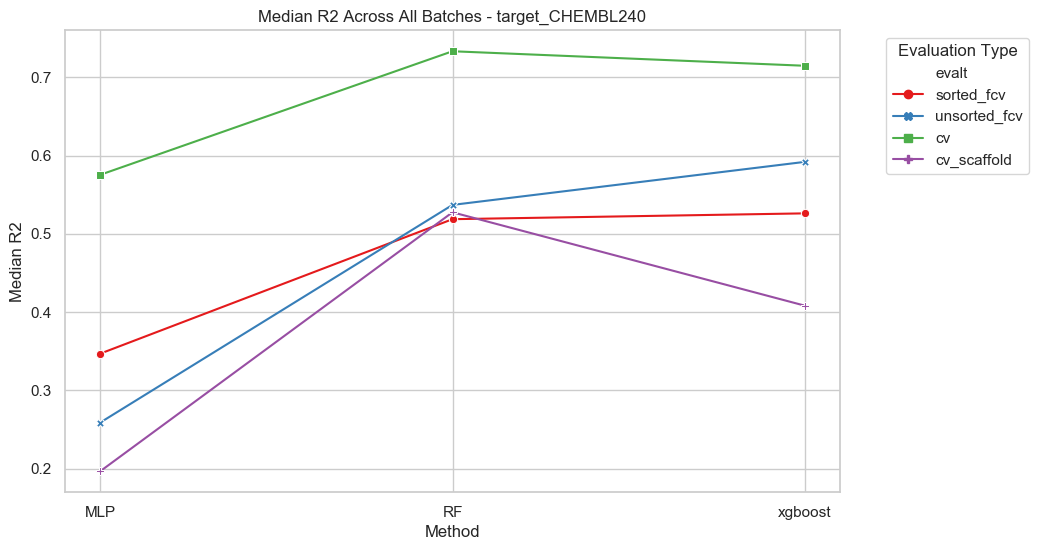

target_CHEMBL260


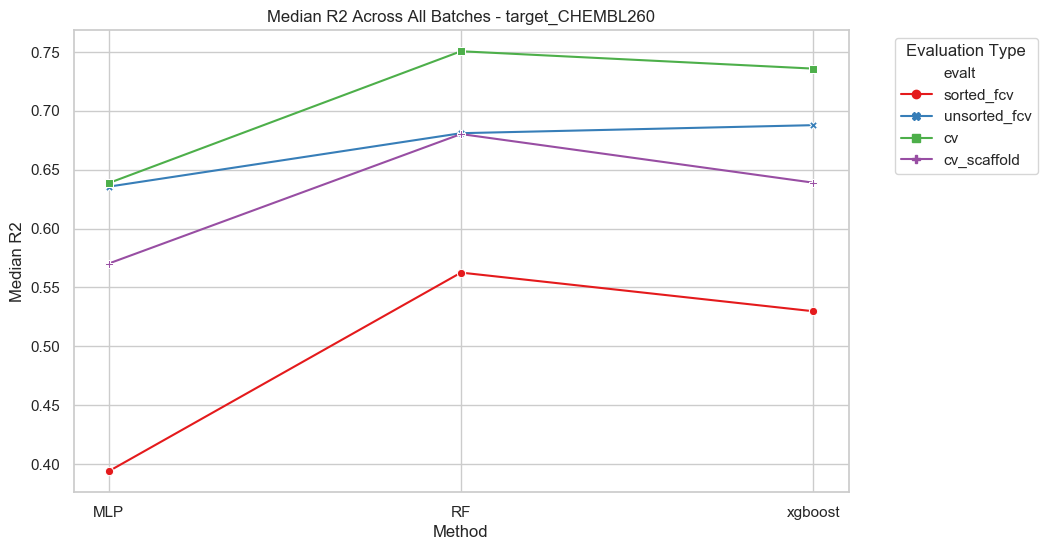

target_CHEMBL279


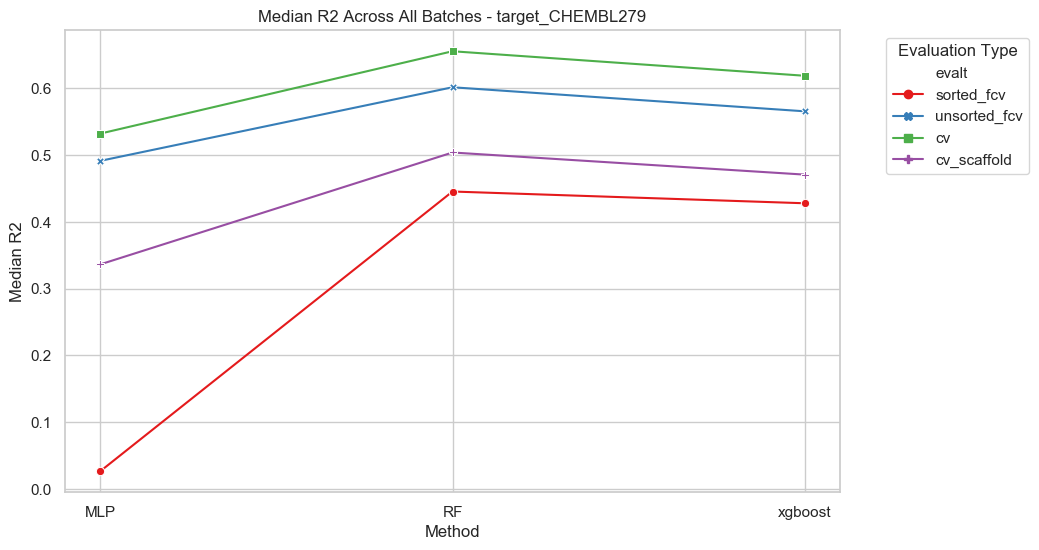

In [122]:
for target in df['Target'].unique():
    print(target)
    test = df[df["Target"] == target]
    test = test[test["Sorting_Var"] != "pchembl"]
    
    # Define the order for the 'evalt' categories
    
    cat_type = CategoricalDtype(categories=["sorted_fcv", "unsorted_fcv", "cv", "cv_scaffold"], ordered=True)

    # Apply the custom categorical order to the 'evalt' column
    test['evalt'] = test['evalt'].astype(cat_type)
    
    # Calculate median RMSE across all batches
    median_rmse = test.groupby(['Method', 'evalt'])['R2'].median().reset_index()
    
    plt.figure(figsize=(10, 6))
    # Create a line plot with scatter points for each target
    sns.lineplot(data=median_rmse, x='Method', y='R2', hue='evalt', marker='o', 
                 palette='Set1', markers=True, style='evalt', dashes=False)

    # Customize the plot
    plt.title(f'Median R2 Across All Batches - {target}')
    plt.xlabel('Method')
    plt.ylabel('Median R2')
    plt.legend(title='Evaluation Type', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.show()
